In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
weather_data = np.load('./weather.npz')['data']
traffic_data = np.load('./PEMS04.npz')['data']

In [3]:
# In order to work with scikit learn, each timestamp has to be listed as a 1d array (307*17, 307*3)
def unpack_data(data):
    return np.reshape(data, [data.shape[0], data.shape[1] * data.shape[2]])

def pack_data(data):
    return np.reshape(data, [data.shape[0], 307, -1])

In [4]:
def rmsle(y_actual, y_pred):
    log1 = np.nan_to_num(np.array([np.log1p(v) for v in y_pred]))
    log2 = np.nan_to_num(np.array([np.log1p(v) for v in y_actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
X = unpack_data(weather_data)
y = unpack_data(traffic_data)
train_X, test_X, train_y, test_y = train_test_split(X, y)
display(train_X.shape)
display(test_X.shape)
display(train_y.shape)
display(test_y.shape)

# Linear Regression

In [ ]:
lr_model = LinearRegression(copy_X = True)
lr_model.fit(train_X, train_y)
lr_model.score(test_X, test_y)

## Individal Features

In [ ]:
X = weather_data.mean(axis = 1)
for i in range(3):
    y = traffic_data[:,:,i]
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    lr_model.fit(train_X, train_y)
    lr_model.score(test_X, test_y)

# Linear Regression w/ Means

## All features at once

In [ ]:
X = weather_data.mean(axis = 1)
y = traffic_data.mean(axis = 1)
train_X, test_X, train_y, test_y = train_test_split(X, y)
display(train_X.shape)
display(test_X.shape)
display(train_y.shape)
display(test_y.shape)

In [ ]:
lr_model = LinearRegression(copy_X = True)
lr_model.fit(train_X, train_y)
pred_y = lr_model.predict(test_X)
display(lr_model.score(test_X, test_y))
display(rmsle(test_y, pred_y))
for i in range(3):
    plt.plot(test_y[:,i], label = 'actual')
    plt.plot(pred_y[:,i], label = 'predicted')
    plt.legend()
    plt.show()

## Individually per feature

In [ ]:
X = weather_data.mean(axis = 1)
y = traffic_data.mean(axis = 1)
y1, y2, y3 = y[:,0], y[:,1], y[:,2]

for y in [y1, y2, y3]:
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    lr_model = LinearRegression(copy_X = True)
    lr_model.fit(train_X, train_y)
    pred_y = lr_model.predict(test_X)
    display(lr_model.score(test_X, test_y))
    display(rmsle(test_y, pred_y))
    plt.plot(test_y, label = 'actual')
    plt.plot(pred_y, label = 'predicted')
    plt.legend()
    plt.show()

# SVM w/ Individual Features

(12744, 17)

(4248, 17)

(12744,)

(4248,)

Best parameters: {'C': 10, 'coef0': 1, 'degree': 10, 'kernel': 'poly'}


0.1637095709332228

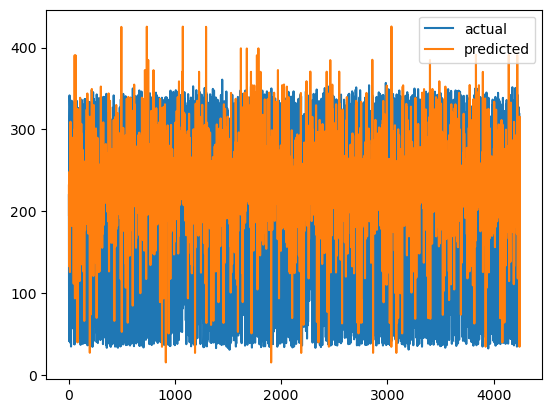

(12744, 17)

(4248, 17)

(12744,)

(4248,)

Best parameters: {'C': 0.1, 'coef0': 1, 'degree': 10, 'kernel': 'poly'}


0.0

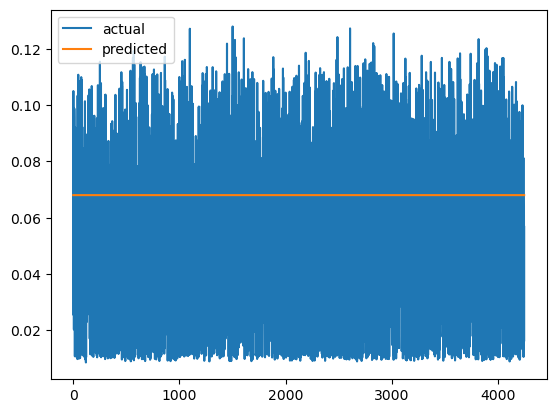

(12744, 17)

(4248, 17)

(12744,)

(4248,)

Best parameters: {'C': 10, 'coef0': 1, 'degree': 10, 'kernel': 'poly'}


0.08545740051780704

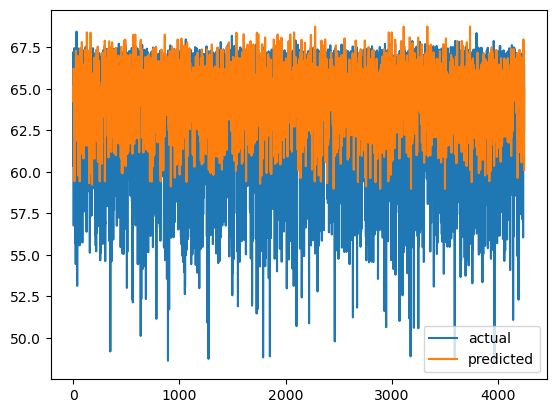

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameters = [{'kernel': ['poly'], 'degree': [10], 'coef0': [1], 'C': [0.1, 1, 10]}]
#parameters = [{'kernel': ['poly'], 'degree': [2, 3, 10], 'coef0': [1], 'C': [0.1, 1, 10, 100]}]

X = weather_data.mean(axis = 1)
for i in range(3):
    y = traffic_data.mean(axis = 1)[:,i]
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    display(train_X.shape)
    display(test_X.shape)
    display(train_y.shape)
    display(test_y.shape)
    clf = GridSearchCV(SVR(), parameters, scoring = 'explained_variance')
    clf.fit(train_X, train_y)
    
    print(f'Best parameters: {clf.best_params_}')
    pred_y = clf.predict(test_X)
    display(clf.score(test_X, test_y))
    plt.plot(test_y, label = 'actual')
    plt.plot(pred_y, label = 'predicted')
    plt.legend()
    plt.show()